In [1]:
!kaggle datasets download -d noordeen/insurance-premium-prediction

  0%|                                               | 0.00/13.4k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 13.4k/13.4k [00:00<00:00, 63.7MB/s]


In [2]:
!unzip insurance-premium-prediction.zip -d data_input

Archive:  insurance-premium-prediction.zip
  inflating: data_input/insurance.csv  


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('./data_input//insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [20]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [21]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [22]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [23]:
# find top 5 where expenses are high
df.sort_values(by='expenses', ascending=False).head()

,age,sex,bmi,children,smoker,region,expenses
543,54,female,47.4,0,yes,southeast,63770.43
1300,45,male,30.4,0,yes,southeast,62592.87
1230,52,male,34.5,3,yes,northwest,60021.40
577,31,female,38.1,1,yes,northeast,58571.07
819,33,female,35.5,0,yes,northwest,55135.40


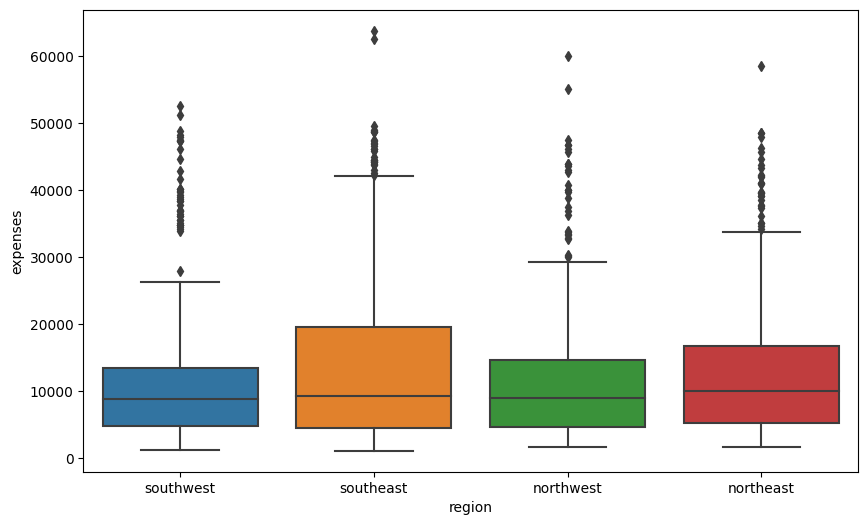

In [24]:
# look for the plot for where the expenses are high

plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='expenses', data=df)
plt.show()



In [25]:
# Find the value counts of male and female on sex column, different approach

print('Male:', df['sex'].value_counts()[0])
print('Female:', df['sex'].value_counts()[1])

Male: 676
Female: 662


In [26]:
# Find the value counts of smoker and non-smoker on smoker column

print('Smoker:', df['smoker'].value_counts()[0])
print('Non-smoker:', df['smoker'].value_counts()[1])

Smoker: 1064
Non-smoker: 274


## I'm trying two different approach for preprocessing the data 

its just a curiosity wether the output will be the same or not. hopefully it will be the same(?) 

### First one im gonna use **one hot encoding** to change the categorical 

In [27]:
# one hot encoding for categorical columns

df_oh = pd.get_dummies(df, drop_first=True)
df_oh.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,False,True,False,False,True
1,18,33.8,1,1725.55,True,False,False,True,False
2,28,33.0,3,4449.46,True,False,False,True,False
3,33,22.7,0,21984.47,True,False,True,False,False
4,32,28.9,0,3866.86,True,False,True,False,False


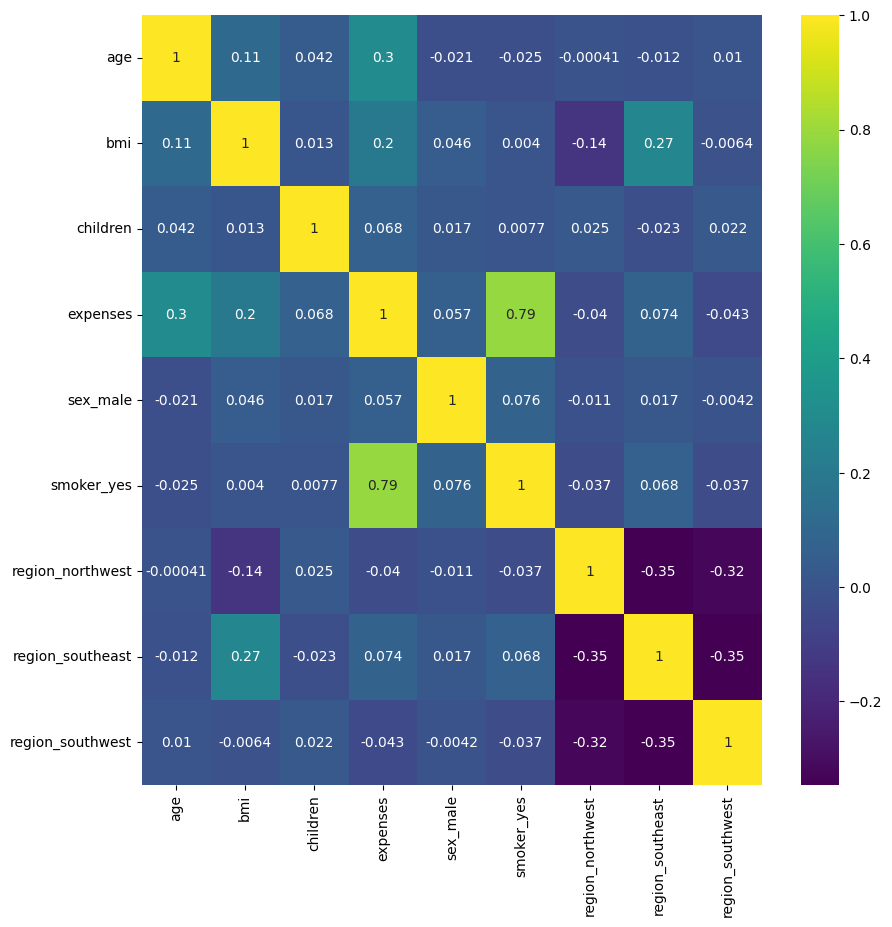

In [29]:
# let see the correlation of each column with each other

plt.figure(figsize=(10, 10))
sns.heatmap(df_oh.corr(), annot=True, cmap='viridis')
plt.show()

In [34]:
# find the annova test, using hypothesis testing

# H0: There is no significant difference between smoker and non-smoker
# H1: There is significant difference between smoker and non-smoker

# p-value is less than 0.05, so we reject the null hypothesis and accept the alternate hypothesis
# find the annova test

from scipy.stats import f_oneway

smoker = df_oh[df_oh['smoker_yes'] == 1]['expenses']
non_smoker = df_oh[df_oh['smoker_yes'] == 0]['expenses']

f_oneway(smoker, non_smoker)
print('p-value:', f_oneway(smoker, non_smoker)[1])

p-value: 8.27144957450302e-283


## Second approach im using categorical into numerical

In [39]:
# make sex and smoker column to numeric

df['sex'] = df['sex'].map({'male':0, 'female':1})
df['smoker'] = df['smoker'].map({'no':0, 'yes':1})
df['region'] = df['region'].map({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3})

df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,0,16884.92
1,18,0,33.8,1,0,1,1725.55
2,28,0,33.0,3,0,1,4449.46
3,33,0,22.7,0,0,2,21984.47
4,32,0,28.9,0,0,2,3866.86


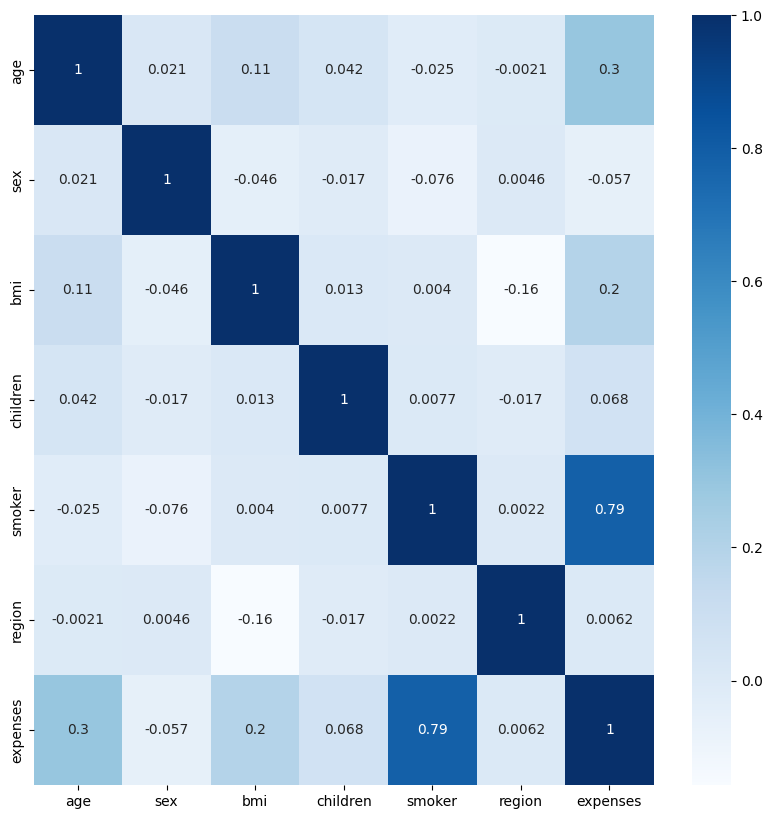

In [40]:
# find correlation between features

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()


- we can see that smoker and expenses are highly correlated, same results as the one hot encoding method

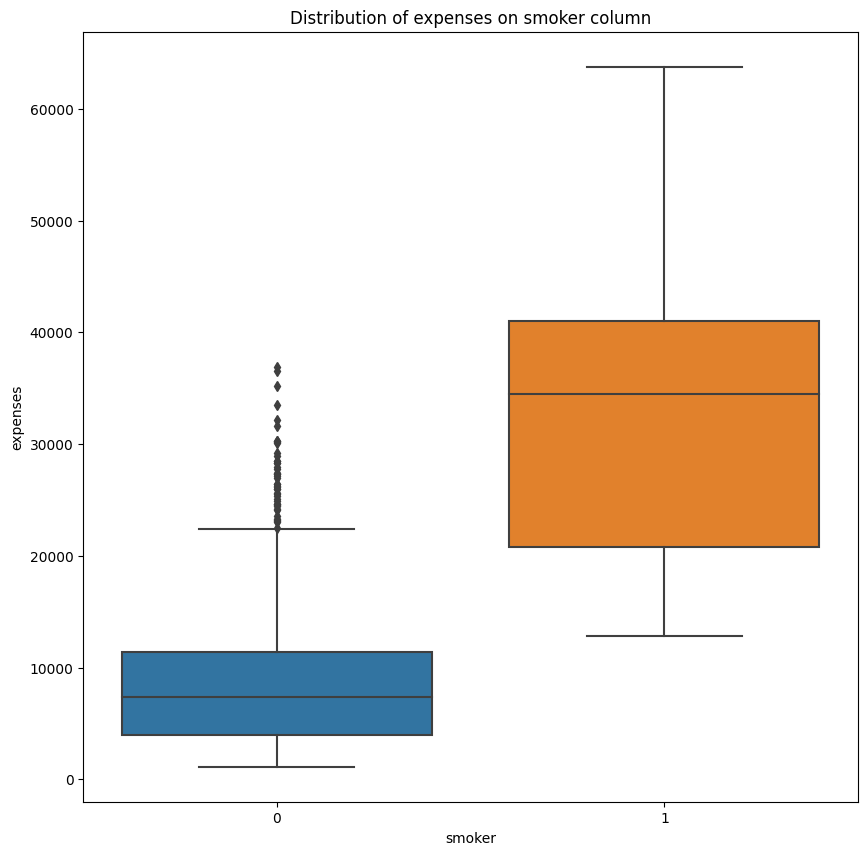

In [41]:
# take a look at the distribution between expenses and smoker column

plt.figure(figsize=(10, 10))
sns.boxplot(x='smoker', y='expenses', data=df)
plt.title('Distribution of expenses on smoker column')
plt.show()

In [42]:
# T- Test

from scipy.stats import ttest_ind

smoker = df[df['smoker'] == 1]['expenses']
non_smoker = df[df['smoker'] == 0]['expenses']

# perform t-test
ttest = ttest_ind(smoker, non_smoker)
print('T-statistics:', ttest.statistic)
print('P-value:', ttest.pvalue)

T-statistics: 46.6649210792002
P-value: 8.271449574495316e-283


In [43]:
# ANOVA Test

from scipy.stats import f_oneway

smoker = df[df['smoker'] == 1]['expenses']
non_smoker = df[df['smoker'] == 0]['expenses']

# perform ANOVA test
anova = f_oneway(smoker, non_smoker)
print('F-statistics:', anova.statistic)
print('P-value:', anova.pvalue)

F-statistics: 2177.6148593279827
P-value: 8.27144957450302e-283


ANOVA results with a very low p-value (close to zero) indicate that there are significant differences in medical expenses among the groups you tested (likely "smoker" categories). The F-statistic measures the magnitude of these differences, and the low p-value strongly suggests that at least one group's mean is different from the others in a statistically significant way.

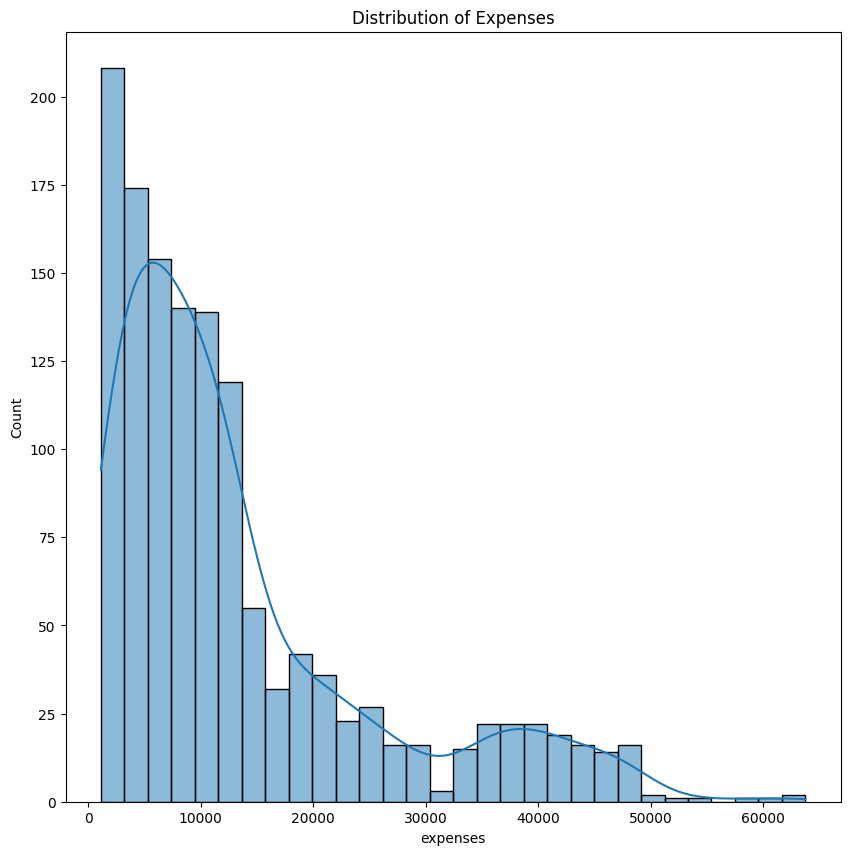

In [44]:
plt.figure(figsize=(10, 10))
sns.histplot(df['expenses'], kde=True)
plt.title('Distribution of Expenses')
plt.show()

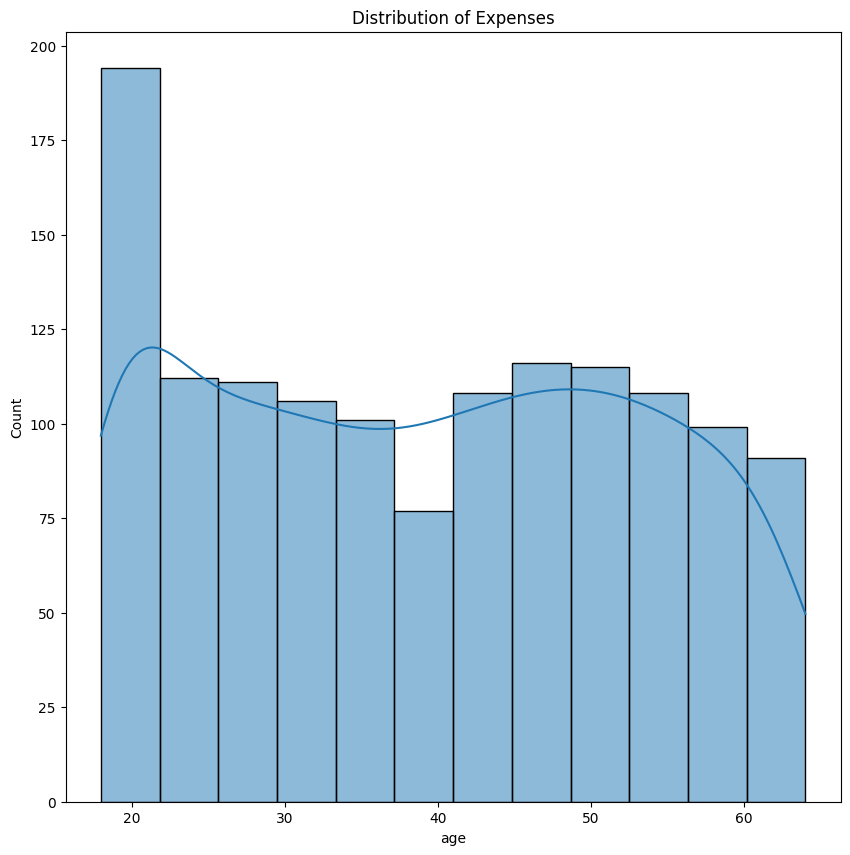

In [45]:
plt.figure(figsize=(10, 10))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Expenses')
plt.show()

In [46]:
# Build Model for prediction

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [47]:
# split data into train and test

X = df.drop('expenses', axis=1)
y = df['expenses']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Linear Regression

- Use simple linear regression when you have a **single predictor variable (feature)** or when you have strong domain knowledge suggesting a linear relationship between the predictor and the target variable.

- Simple linear regression is more straightforward and easier to interpret when there are clear linear relationships in the data, and you don't need to perform feature selection.

- If your primary goal is to fit a linear model without imposing regularization or feature selection, and you have a small number of predictor variables, simple linear regression may be a good choice.



In [48]:
LinearRegression = LinearRegression()
LinearRegression.fit(X_train, y_train)

# predict the test data
y_pred = LinearRegression.predict(X_test)

# find the score of the model
print('Score:', LinearRegression.score(X_test, y_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

Score: 0.7833214205203848
RMSE: 5799.920265829356
MAE: 4186.9401063170135
R2: 0.7833214205203848


If your primary concern is minimizing the financial impact of errors, you might lean toward **RMSE**. However, if you want a more interpretable and easily understandable measure of prediction accuracy, **MAE** can be a valid choice.

# Lasso Model

- Use Lasso regression when you have a **large number of predictor variables (features)** and you suspect that not all of them are relevant. Lasso can automatically perform feature selection by driving some of the coefficients to exactly zero, effectively removing those features from the model.

- Lasso is particularly useful when you want to create a more interpretable model that focuses on a subset of the most important features, reducing model complexity.

- Lasso is helpful when you want to prevent overfitting by adding L1 regularization to the linear regression model, which can reduce the risk of fitting noise in the data.

In [49]:
# Try lasso 
from sklearn.linear_model import Lasso

Lasso = Lasso()
Lasso.fit(X_train, y_train)

# predict the test data
y_pred = Lasso.predict(X_test)

# find the score of the model
print('Score:', Lasso.score(X_test, y_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))


Score: 0.7832948524539634
RMSE: 5800.275833841662
MAE: 4187.676268278807


## Random Forest

- Random Forest can capture complex, non-linear relationships between predictor variables and insurance expenses, making it suitable for situations where the relationship is not purely linear.

- It is less prone to overfitting compared to individual decision trees, thanks to the ensemble approach.

- Feature importance: Random Forest can provide information about the importance of each predictor variable in making predictions, which can be valuable for understanding the factors influencing insurance expenses.

- It can handle a mix of categorical and numerical predictor variables.

In [51]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

RandomForestRegressor = RandomForestRegressor()
model_rf = RandomForestRegressor.fit(X_train, y_train)

# predict the test data
y_pred = model_rf.predict(X_test)

# find the score of the model
print('Score:', RandomForestRegressor.score(X_test, y_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))

Score: 0.8632925504420291
RMSE: 4606.914198780393
MAE: 2477.546923955224


Based on these metrics, **Random Forest** appears to be the **best-performing model** among the three. It has the highest R-squared, the lowest RMSE, and the lowest MAE. This suggests that Random Forest provides the best trade-off between explanatory power and predictive accuracy.

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,0,16884.92
1,18,0,33.8,1,0,1,1725.55
2,28,0,33.0,3,0,1,4449.46
3,33,0,22.7,0,0,2,21984.47
4,32,0,28.9,0,0,2,3866.86


In [20]:
# test with new data

new_data = [[19, 1, 27.9, 0, 1, 0]]
print('Linear Regression:', LinearRegression.predict(new_data))
print('Lasso:', Lasso.predict(new_data))
print('Random Forest:', RandomForestRegressor.predict(new_data))


Linear Regression: [25138.01692601]
Lasso: [25132.9131742]
Random Forest: [17019.756]


In [21]:
# make new column category based on expenses, 0-20000 low, 20000-40000 medium, 40000-60000 high

df['premium_category'] = df['expenses'].apply(lambda x: 'low' if x < 20000 else ('medium' if x < 40000 else 'high'))
df.head()

,age,sex,bmi,children,smoker,region,expenses,premium_category
0,19,1,27.9,0,1,0,16884.92,low
1,18,0,33.8,1,0,1,1725.55,low
2,28,0,33.0,3,0,1,4449.46,low
3,33,0,22.7,0,0,2,21984.47,medium
4,32,0,28.9,0,0,2,3866.86,low


In [60]:
# try multiouput regressor

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

x = df.drop(['expenses', 'premium_category'], axis=1)
y = df[['expenses', 'premium_category']]

# encode the categorical premium_category column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y['premium_category'] = le.fit_transform(y['premium_category'])

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# multioutput with random forest
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, max_depth=30, random_state=42))
model.fit(X_train, y_train)

# predict the test data
y_pred = model.predict(X_test)

# split the predicted data into expenses and premium_category
y_pred_expenses = y_pred[:, 0]
y_pred_category = y_pred[:, 1]

# Decode the premium_category column
y_pred_category = le.inverse_transform(y_pred_category.astype(int))



In [26]:
# evaluate the model with new data 
new_data = [[19, 1, 27.9, 0, 1, 0]]
print('Multioutput Regressor:', model.predict(new_data))
print('Expenses:', y_pred_expenses)
print('Premium Category:', y_pred_category)

Multioutput Regressor: [[1.70040833e+04 1.05000000e+00]]
Expenses: [11473.6618      5040.4374     28113.074       9882.4022
 34407.5887      9042.364       2164.1449     14256.2018
  8506.3587     10579.645      19639.7927      7267.3704
  4217.3304     45790.193      48272.5586     45334.9689
  9898.0905     43040.3717      8435.8129     23484.8687
  6023.8186      9746.013       2402.3725      3053.2156
 11795.5528     11870.8057     13144.3464      6300.0729
 10184.6016      4548.21306286  7840.4265     11917.6819
  2035.5702      5521.4079      3177.3973     11081.8827
  2768.9366      8586.0449     23988.7346     39289.3691
  5941.8616      3913.736      12479.3021     15133.7789
  6070.3745     14567.1339     15478.8426      5442.1621
 41857.6467      6186.5779     13872.5249      2650.0354
  6715.3667      1839.2455     12305.9212     11319.0011
  3550.2758     43694.7037     12308.3499     15310.2343
 13728.4423      8049.4113     19973.3725      7838.9642
 11745.3997      6654

In [36]:
le.fit(df['premium_category'])
le.fit(y_train['premium_category'])


LabelEncoder()

In [50]:
encoded_labels = le.classes_
print(encoded_labels)

[0 1 2]


In [52]:
encoded_value = 1  # Replace with the encoded value you want to decode
decoded_label = le.inverse_transform([encoded_value])
print(f'Encoded value {encoded_value} corresponds to label {decoded_label[0]}')


Encoded value 1 corresponds to label 1


In [57]:
df.head()

,age,sex,bmi,children,smoker,region,expenses,premium_category
0,19,1,27.9,0,1,0,16884.92,low
1,18,0,33.8,1,0,1,1725.55,low
2,28,0,33.0,3,0,1,4449.46,low
3,33,0,22.7,0,0,2,21984.47,medium
4,32,0,28.9,0,0,2,3866.86,low


In [55]:
# Evaluate the model with new data 
new_data = [[19, 1, 27.9, 0, 1, 0]]
predictions = model.predict(new_data)
predicted_expenses = predictions[0][0]  # Extract predicted expenses
predicted_category = y_pred_category[0]  # Extract predicted category


# Print the results with labels
print('New Data:')
print('Age: 19, Gender: Male, BMI: 27.9, Smoker: No, Region: Southeast, Children: 0')
print('----------------------------------------')
print(f"Predicted Expenses: {predicted_expenses:.2f}")
print('Predicted Premium Category:', predicted_category)


New Data:
Age: 19, Gender: Male, BMI: 27.9, Smoker: No, Region: Southeast, Children: 0
----------------------------------------
Predicted Expenses: 17245.58
Predicted Premium Category: low


In [59]:
# try with another example 
new_data = [[32, 0, 28.9, 0, 0, 2]]
predictions = model.predict(new_data)
predicted_expenses = predictions[0][0]  # Extract predicted expenses
predicted_category = y_pred_category[0]  # Extract predicted category

# print the results with labels
print('New Data:')
print('Age:32, Gender:Male, BMI:28.9, Smoker:No, Region:Northwest, Children:2')
print('----------------------------------------')
print(f"Predicted Expenses: {predicted_expenses:.2f}")
print('Predicted Premium Category:', predicted_category)


New Data:
Age:32, Gender:Male, BMI:28.9, Smoker:No, Region:Northwest, Children:2
----------------------------------------
Predicted Expenses: 3981.12
Predicted Premium Category: low


In [56]:
# find the score of the model
print('Score:', model.score(X_test, y_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))

Score: 0.7378287178665379
RMSE: 3213.8028494816
MAE: 1230.0022184701495


## Saving my random forest model

In [52]:
# save the model into h5

import joblib

rf_model = 'model_rf.h5'

joblib.dump(model_rf, rf_model)
print('Model saved successfully')

Model saved successfully


Trying different approach with param_grid

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
}

# Create a Random Forest Regressor
rf = RandomForestRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Fit the model with the best hyperparameters
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train, y_train)


Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 4, 'n_estimators': 100}


RandomForestRegressor(max_depth=30, min_samples_leaf=4)

In [55]:
from sklearn.ensemble import RandomForestRegressor

# Create a new Random Forest Regressor with the best hyperparameters
best_rf = RandomForestRegressor(max_depth=30, min_samples_leaf=4, n_estimators=100)

# Fit the model to your training data
best_rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=30, min_samples_leaf=4)

In [57]:
# Predict on the test data
y_pred = best_rf.predict(X_test)

# Evaluate the model
print('Score:', best_rf.score(X_test, y_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))


Score: 0.8781594475330285
RMSE: 4349.2058455650185
MAE: 2409.0153985805473
